Dataset link
https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

# Logistic Regression

For a more detailed lesson on Logistic Regression see (watch the entire series) https://www.youtube.com/watch?v=zAULhNrnuL4

Used to predict categories (as opposed to a numerical values in Linear Regression) and solve classification machine learning problems. 

Will customer buy a product?
Will the team win the game?





 ## What are the chances of a customer buying a product based on their gender?

# **Bank Marketing Data Set**

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


Attribute Information:

Input variables:

**Bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


**Social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Exploring and creating a logistic model using banking data:

In [1]:
# Create a DataFrame variable containing the banking data CSV file.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)
bankData = pd.read_csv('banking.csv')

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Display output as numbers not scientific notation
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Explore the dataset and determine what the dependent variable (target array) is. 
# Analyze the dependent variable as well as some key independent variables and make sure there are no missing values.
print(bankData.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.10           9

In [3]:
print(bankData.shape)

(41188, 21)


In [4]:
print(bankData.columns.values)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']


In [5]:
print(bankData.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [6]:
bankData['education'].unique().shape

(8,)

#### Data set has no missing values

### Visualizing categorical variables

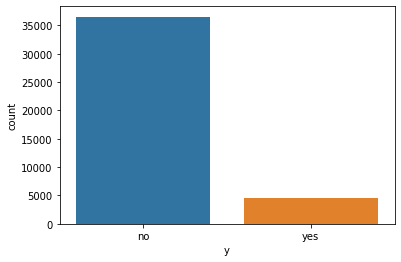

In [7]:
# Labels against frequency 
plt.figure()
sb.countplot(x='y', data=bankData)

plt.show()

In [8]:
bankData["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Dataset is imbalanced 

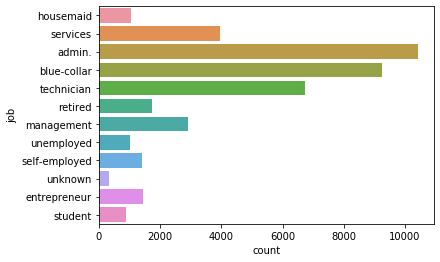

In [9]:
# Distribution of Jobs
plt.figure()
sb.countplot(y='job', data=bankData)

plt.show()

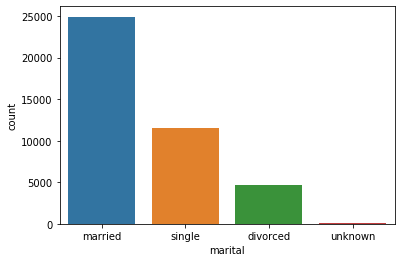

In [10]:
# Distribution on marital status
plt.figure()
sb.countplot(x='marital', data=bankData)

plt.show()

In [11]:
# Create dummy variables for all the categorical variables that you have kept.
df2 = pd.get_dummies(bankData, columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome', 'education','contact'])

In [12]:
# Determine what features to include in the model. Remove the features you won’t include from the dataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   month                          41188 non-null  object 
 2   day_of_week                    41188 non-null  object 
 3   duration                       41188 non-null  int64  
 4   campaign                       41188 non-null  int64  
 5   pdays                          41188 non-null  int64  
 6   previous                       41188 non-null  int64  
 7   emp.var.rate                   41188 non-null  float64
 8   cons.price.idx                 41188 non-null  float64
 9   cons.conf.idx                  41188 non-null  float64
 10  euribor3m                      41188 non-null  float64
 11  nr.employed                    41188 non-null  float64
 12  y                              41188 non-null 

In [13]:
# Drop one variable from each of the sets of dummy vraibles. No information will be lost.  
df2.drop( ['job_unknown', 'marital_unknown' , 'default_unknown', 'housing_unknown', 'loan_unknown' , 'poutcome_nonexistent'
          ,'education_unknown','contact_telephone'], axis=1, inplace = True )

#Drop variables that do might not have an impact on the output  
df2.drop( ['month', 'day_of_week'], axis=1, inplace = True )

In [14]:
# check data types of all the variables. 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [15]:
# converting y from 'yes' and 'no' to 1 and 0
df2['y'] = df2.y.map(dict(yes=1, no=0))

In [16]:
df2.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_success', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_cellular'],
      dtype='object')

#### Note all the variables are neumerical execpt for y

In [17]:
# Split the data into a training and test set. 

# All columns are features execpt for y
X = df2.loc[:, ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_success', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_cellular']]

# y is the target variable
y = df2.loc[:, ['y']]

In [18]:
#import a prebuilt function to split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28831, 40)
(28831, 1)
(12357, 40)
(12357, 1)


In [19]:
# Fit your training data to a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# diclare the logistic model
model = LogisticRegression()

# train the model on the data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
model.coef_

array([[ 3.36681685e-03,  4.48562022e-03, -7.03026507e-02,
        -1.68222953e-03,  1.76680568e-02, -2.60561800e-01,
         1.91184340e-01,  4.33534203e-02, -2.76033640e-01,
        -3.42029337e-03,  1.01936882e-02, -2.24273101e-02,
        -8.67140719e-04, -3.38207740e-04,  2.25035609e-03,
         8.62107704e-03, -3.41854422e-04, -5.59794817e-03,
         8.41992440e-03,  1.61874005e-03,  1.46498182e-03,
        -2.64274853e-03, -1.44393758e-02,  1.96592230e-02,
         2.77328703e-02, -3.21739554e-06, -2.01043579e-03,
         5.07868679e-03,  4.76553535e-03, -1.69728434e-03,
         7.30231646e-03,  3.19401959e-03, -4.59417031e-03,
        -3.91532749e-03, -9.81446191e-03, -2.24170139e-03,
         1.34212574e-04,  1.38894505e-03,  1.94208626e-02,
         4.03311904e-02]])

In [21]:
model.coef_.shape

(1, 40)

0.9112244072185806
[[10701   268]
 [  829   559]]


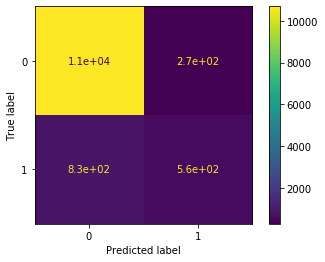

In [22]:
# Use the testing data to make predictions and determine the accuracy of your predictions.
y_pred = model.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

##### Define a function for confusion metrix

In [23]:
def model_evaluation (model, X_test, y_test):
    '''
    Pass (model, x_test, y_test)
    '''
    
    y_pred = model.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))
    # Plot and print confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cnf_matrix)
    metrics.plot_confusion_matrix(model, X_test, y_test)
    plt.show()

In [24]:
# Calculating a base line for comparing the model. 
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

0.8872047448926502
[[25579     0]
 [ 3252     0]]


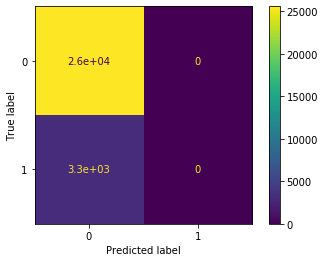

In [25]:
model_evaluation(dummy_clf, X_train, y_train)

#### Plot ROC Score

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.9234378887527674

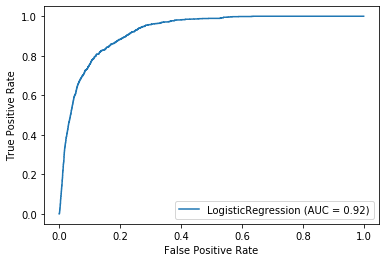

In [27]:
import matplotlib.pyplot as plt
metrics.plot_roc_curve(model, X_test, y_test) 
plt.show()

## Simplify Model 

A simpler model is more generalizable. Let's reduce some of the complexity of the model by eliminating features using the RFE and VIF techniques. 

#### Feature Selection Using RFE


In [28]:
from sklearn.feature_selection import RFE


rfe = RFE(model, 20)           # running RFE with 20 variable output. # 20 is a arbitrary number. 
rfe = rfe.fit(X_train, y_train)

The list below will show features that the RFE technique has ranked not included in the top 20. 

In [29]:
col = X_train.columns[rfe.support_]

In [30]:
col

Index(['campaign', 'emp.var.rate', 'cons.conf.idx', 'euribor3m',
       'job_blue-collar', 'job_management', 'job_retired', 'job_services',
       'job_student', 'marital_divorced', 'marital_married', 'marital_single',
       'default_no', 'loan_no', 'poutcome_success', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_university.degree', 'contact_cellular'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['age', 'duration', 'pdays', 'previous', 'cons.price.idx', 'nr.employed',
       'job_admin.', 'job_entrepreneur', 'job_housemaid', 'job_self-employed',
       'job_technician', 'job_unemployed', 'default_yes', 'housing_no',
       'housing_yes', 'loan_yes', 'poutcome_failure', 'education_basic.4y',
       'education_illiterate', 'education_professional.course'],
      dtype='object')

Till ow we have been using sklearn to build a logistic model. From this point let's start using stats models. Stats models gives addional infromation about the importance of features other things. 

## Assessing the model with StatsModels and selected columns

In [32]:
import statsmodels.api as sm

In [33]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28810
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8291.5
Date:                Tue, 05 Apr 2022   Deviance:                       16583.
Time:                        19:12:48   Pearson chi2:                 3.06e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.2868      0.509      2.527      0.012       0.289       2.285
campaign                       -0.0539      0.011     -4.736      0.000      -0.076      -0.032
emp.var.rate                    0.1992      0.047      4.215      0.000       0.107       0.292
cons.conf.idx                   0.0464      0.004     11.139      0.000       0.038       0.055
euribor3m                      -0.5863      0.044    -13.339      0.000      -0.672      -0.500
job_blue-collar                -0.2832      0.069     -4.135      0.000      -0.417      -0.149
job_management                  0.0692      0.081      0.852      0.394      -0.090       0.228
job_retired                     0.4159      0.086      4.846      0.000       0.248       0.584
job_services                   -0.1818      0.083     -2.179      0.029      -0.345      -0.018
job_student                     0.3968      0.108      3.665      0.000       0.185       0.609
marital_divorced               -0.2168      0.421     -0.515      0.606      -1.042       0.608
marital_married                -0.1603      0.417     -0.384      0.701      -0.978       0.657
marital_single                 -0.1077      0.417     -0.258      0.796      -0.926       0.710
default_no                      0.3135      0.067      4.700      0.000       0.183       0.444
loan_no                         0.0594      0.055      1.082      0.279      -0.048       0.167
poutcome_success                1.6940      0.077     21.905      0.000       1.542       1.846
education_basic.6y             -0.0083      0.110     -0.075      0.940      -0.223       0.207
education_basic.9y             -0.0999      0.076     -1.315      0.188      -0.249       0.049
education_high.school          -0.0861      0.062     -1.387      0.165      -0.208       0.036
education_university.degree     0.0356      0.057      0.621      0.535      -0.077       0.148
contact_cellular                0.3828      0.056      6.809      0.000       0.273       0.493
===============================================================================================
"""

In [34]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

31880   0.15
38177   0.31
2459    0.03
756     0.04
11275   0.03
29677   0.18
13016   0.05
1518    0.04
34983   0.18
24965   0.05
dtype: float64

In [35]:
y_train_pred_final = pd.DataFrame({'y':y_train.y, 'y_Prob':y_train_pred})

y_train_pred_final.head()

,y,y_Prob
31880,0,0.15
38177,0,0.31
2459,0,0.03
756,0,0.04
11275,0,0.03


In [36]:
#Creating new column 'predicted' with 1 if y_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.tail()

,y,y_Prob,predicted
20757,0,0.07,0
32103,0,0.20,0
30403,1,0.17,0
21243,0,0.08,0
2732,0,0.05,0


In [37]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)

[[25324   255]
 [ 2647   605]]


In [38]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

0.8993444556206861


#### Define a dunction to calculate the accuracy score and the confusion metrics for the stats models 

In [39]:
def sm_model_evaluation (model, x_test, y_test, columns):
    '''
    model = sm model
    y_test = series of labels 
    columns = list of columns in features
    x_test = test dataframe 
    '''
    X_sm = sm.add_constant(x_test[columns])
    y_pred = res.predict(X_sm)
    y_train_pred_final = pd.DataFrame({'y':y_test.y, 'y_Prob':y_pred})
    y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
    confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
    print(confusion)

In [40]:
sm_model_evaluation (res, X_test, y_test, col)

0.8978716516953953
[[10849   120]
 [ 1142   246]]


Make a loop testing various number of features. 

In [40]:
for i in range(10, 41):
    rfe = RFE(model, i)           # running RFE with 20 variable output.
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    X_train_sm = sm.add_constant(X_train[col])
    logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()
    print ("=====================================================")
    print (i)
    sm_model_evaluation (res, X_test, y_test, col)

10
0.8976288743222465
[[10836   133]
 [ 1132   256]]
11
0.8975479485311969
[[10835   134]
 [ 1132   256]]
12
0.8976288743222465
[[10837   132]
 [ 1133   255]]
13
0.8975479485311969
[[10836   133]
 [ 1133   255]]
14
0.8973860969490977
[[10835   134]
 [ 1134   254]]
15
0.8973860969490977
[[10835   134]
 [ 1134   254]]
16
0.8973860969490977
[[10835   134]
 [ 1134   254]]
17
0.8973860969490977
[[10835   134]
 [ 1134   254]]
18
0.897952577486445
[[10850   119]
 [ 1142   246]]
19
0.8978716516953953
[[10849   120]
 [ 1142   246]]
20
0.8978716516953953
[[10849   120]
 [ 1142   246]]
21
0.8990855385611395
[[10839   130]
 [ 1117   271]]
22
0.8988427611879906
[[10842   127]
 [ 1123   265]]
23
0.8988427611879906
[[10842   127]
 [ 1123   265]]
24
0.8989236869790402
[[10843   126]
 [ 1123   265]]
25
0.8988427611879906
[[10842   127]
 [ 1123   265]]
26
0.9125192198753743
[[10704   265]
 [  816   572]]
27
0.9126810714574735
[[10704   265]
 [  814   574]]
28
0.9126001456664239
[[10704   265]
 [  815   

Conclusion: 

If we keep 26 features it appears that there is a slight improvement in performance which stays the same even if we increase the maximum features till 40. 

Let's find columns we need to keep. 

In [41]:
rfe = RFE(model, 26)           # running RFE with 26 variable output.
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
sm_model_evaluation (res, X_test, y_test, col)

0.9125192198753743
[[10704   265]
 [  816   572]]


In [42]:
col

Index(['duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_management', 'job_retired', 'job_services',
       'job_student', 'marital_divorced', 'marital_married', 'marital_single',
       'default_no', 'loan_no', 'loan_yes', 'poutcome_success',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_university.degree',
       'contact_cellular'],
      dtype='object')

In [43]:
# Create correlation matrix
corr_matrix = X_train[col].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [46]:
upper.style.background_gradient(cmap ='viridis')

,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_management,job_retired,job_services,job_student,marital_divorced,marital_married,marital_single,default_no,loan_no,loan_yes,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_university.degree,contact_cellular
duration,nan,0.072814,0.025821,0.003594,0.010005,0.031839,0.042158,0.011393,0.016304,0.001778,0.013210,0.001168,0.010743,0.005988,0.001213,0.001846,0.009595,0.004371,0.001269,0.044398,0.010160,0.005467,0.005382,0.006013,0.016179,0.027909
campaign,nan,nan,0.149065,0.125655,0.013693,0.133792,0.143049,0.010635,0.001923,0.008549,0.007906,0.001802,0.022952,0.007748,0.000086,0.006612,0.039166,0.004956,0.004858,0.051658,0.001352,0.000190,0.001216,0.003141,0.000748,0.077274
emp.var.rate,nan,nan,nan,0.774732,0.190506,0.971979,0.905892,0.027743,0.063825,0.017083,0.107831,0.022374,0.136536,0.018219,0.082826,0.101809,0.205157,0.003554,0.001900,0.256156,0.028976,0.026521,0.024484,0.014823,0.047516,0.393486
cons.price.idx,nan,nan,nan,nan,0.053296,0.686644,0.518752,0.043830,0.081267,0.023427,0.059918,0.034738,0.061188,0.019559,0.049403,0.066768,0.169180,0.000300,0.006104,0.074069,0.045011,0.035902,0.038553,0.006931,0.090502,0.590020
cons.conf.idx,nan,nan,nan,nan,nan,0.273544,0.097973,0.033857,0.096740,0.004260,0.089729,0.056472,0.005585,0.013917,0.062859,0.057798,0.026263,0.007102,0.011532,0.076285,0.019225,0.027404,0.071278,0.053341,0.072590,0.250862
euribor3m,nan,nan,nan,nan,nan,nan,0.944825,0.027394,0.052835,0.002010,0.104472,0.017882,0.144626,0.019045,0.092390,0.112710,0.197707,0.002222,0.000542,0.282570,0.026271,0.024364,0.022765,0.018423,0.036967,0.399385
nr.employed,nan,nan,nan,nan,nan,nan,nan,0.027023,0.068948,0.003640,0.130208,0.023880,0.160761,0.017372,0.085749,0.104591,0.191917,0.004915,0.005831,0.352553,0.015978,0.027170,0.033169,0.011242,0.037531,0.268902
job_admin.,nan,nan,nan,nan,nan,nan,nan,nan,0.313936,0.160064,0.121801,0.191051,0.086495,0.022192,0.121197,0.116522,0.122044,0.015812,0.019894,0.025345,0.180414,0.105764,0.164382,0.118352,0.332226,0.059697
job_blue-collar,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.147613,0.112327,0.176190,0.079767,0.055492,0.128609,0.100102,0.177693,0.006688,0.009493,0.063085,0.262991,0.236372,0.373985,0.175353,0.337189,0.101750
job_management,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.057271,0.089832,0.040670,0.001538,0.064503,0.068380,0.031501,0.002457,0.002313,0.004935,0.062144,0.034558,0.068602,0.083426,0.249400,0.005132


## Checking VIFs

In [43]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,nr.employed,35428.79
3,cons.price.idx,30273.92
14,marital_married,305.86
5,euribor3m,260.94
15,marital_single,144.28
4,cons.conf.idx,122.42
13,marital_divorced,57.80
17,loan_no,35.56
2,emp.var.rate,30.63
18,loan_yes,7.31


In [45]:
#Columns with high VIF need to be dropped starting with euribor3m
col = col.drop(['nr.employed','cons.price.idx','marital_married','euribor3m','marital_single','cons.conf.idx',
                'marital_divorced','loan_no','emp.var.rate','loan_yes'], 1)
col

Index(['duration', 'campaign', 'job_admin.', 'job_blue-collar',
       'job_management', 'job_retired', 'job_services', 'job_student',
       'default_no', 'poutcome_success', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_university.degree', 'contact_cellular'],
      dtype='object')

In [46]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

#### Evaluate the model 

In [47]:
X_sm = sm.add_constant(X_test[col])
y_pred = res.predict(X_sm)
y_train_pred_final = pd.DataFrame({'y':y_test.y, 'y_Prob':y_pred})
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)

0.904750343934612
[[10714   255]
 [  922   466]]


## Finding optimal cut off point

Recall is the metric we will follow since we want to capture as many positives as possible. 

At the same time while increasing recall, precision also decreases. Let let's calcualte recall and precision for all thresholds and find the optimum point. 

In [48]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
15500,1,0.20,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29034,0,0.07,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11199,0,0.01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22247,0,0.04,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27180,0,0.07,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Thresold_prob','accuracy','recall','precision'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    accuracy = (TP + TN)/total1
    
    recall = TP / (TP+FP)
    precision = TP / (TP+FN)
    cutoff_df.loc[i] =[ i ,accuracy,recall,precision]
cutoff_df

,Thresold_prob,accuracy,recall,precision
0.00,0.00,0.11,0.11,1.00
0.05,0.05,0.59,0.21,0.96
0.10,0.10,0.82,0.36,0.82
0.15,0.15,0.88,0.47,0.72
0.20,0.20,0.89,0.52,0.63
0.25,0.25,0.90,0.56,0.56
0.30,0.30,0.90,0.59,0.50
0.35,0.35,0.91,0.61,0.45
0.40,0.40,0.91,0.63,0.41
0.45,0.45,0.91,0.64,0.37


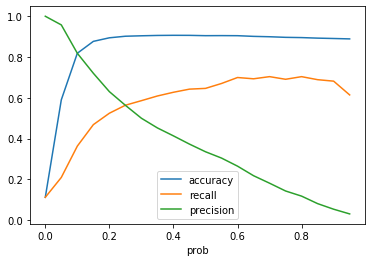

In [50]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','recall','precision'])
plt.show()

From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

In [51]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
15500,1,0.20,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29034,0,0.07,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11199,0,0.01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22247,0,0.04,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27180,0,0.07,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.final_predicted)

0.9019988670389253

In [53]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.final_predicted )
confusion2

array([[10364,   605],
       [  606,   782]], dtype=int64)

Tune it to bussniess requirements